### 501. Introdução ao Meanshift
<h1>Algoritmo MinShift</h1><h2>Características</h2><ul><li>Requer dados numéricos contínuos na mesma escala</li><li>Apenas um parâmetro obrigatório:<ul><li>BandWidth (raio)</li></ul></li><li>Desvantagem:<ul><li>Apenas um parâmetro para inferência</li><li>Função no Scikit-Learn faz inferência do raio ideal</li></ul></li></ul><h2>Vantagens</h2><ul><li>Identifica classes com diferentes formatos</li><li>Robusto a outliers</li><li>Opção para ignorar outliers</li></ul><h2>Desvantagens</h2><ul><li>Não adequado para grandes conjuntos de dados</li><li>Performance lenta, pouco escalável</li></ul><h2>Funcionamento</h2><ul><li>Baseado em densidade de pontos (distribuição Kernel)</li><li>Considera todos os pontos e abre um raio</li><li>Identifica região mais densa</li><li>Pontos tendem para região mais densa = centróide</li><li>Várias iterações até convergir nos centróides</li><li>Centróides = regiões mais densas</li></ul><h2>Parâmetro principal</h2><ul><li>Tamanho do raio</li><li>Define vizinhança considerada</li><li>Pontos vão para onde tem mais vizinhos</li></ul><h2>Aplicação</h2><ul><li>Verificar cluster mais próximo para cada ponto</li><li>Atribuir ponto ao cluster</li></ul>

### 502 .Meanshift na prática
<p>TEMA CENTRAL: Algoritmo de clusterização MinShift</p><ul><li><p>O que é:</p><ul><li>Encontra regiões de alta densidade nos dados</li><li>O centroide se move em direção a regiões de maior densidade</li></ul></li><li><p>Parâmetros:</p><ul><li>bandwidth (raio):<ul><li>Controla o tamanho dos clusters</li><li>Valores menores -&gt; mais clusters</li><li>Valores maiores -&gt; menos clusters</li></ul></li><li>cluster_all:<ul><li>Considera (True) ou não (False) outliers como parte dos clusters</li></ul></li><li>bin_seeding:<ul><li>Acelera o algoritmo usando uma versão simplificada dos dados</li><li>Por padrão é False (usa todos os pontos)</li></ul></li></ul></li><li><p>Funcionamento:</p><ul><li>Estima centroides iniciais</li><li>Move os centroides em direção a regiões de maior densidade</li><li>Aloca pontos ao cluster do centroide mais próximo</li><li>Para quando os centroides convergem</li></ul></li><li><p>Vantagens:</p><ul><li>Encontra clusters de formatos arbitrários</li><li>Não precisa especificar número de clusters</li></ul></li><li><p>Desvantagens:</p><ul><li>Sensível à estimativa do bandwidth</li><li>Computacionalmente mais lento</li></ul></li><li><p>Utilização:</p><ul><li>Dados com agrupamentos não linearmente separáveis</li><li>Identificar regiões de alta densidade nos dados</li></ul></li></ul>

In [6]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [7]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1e3), n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.004128,7.852632
1,0.670479,4.040943
2,-2.263678,8.273068
3,-2.350730,2.277237
4,2.228740,1.145386


<Axes: xlabel='A', ylabel='B'>

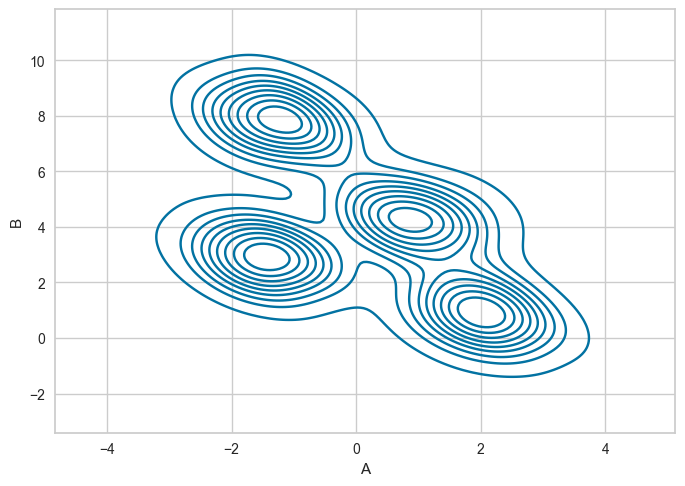

In [8]:
# Density plot
sns.kdeplot(data=df, x='A', y = 'B')

In [9]:
# Model & labels
model = MeanShift()
labels = model.fit_predict(X)

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
# Estimating bandwidth
estimate_bandwidth(X)

np.float64(2.8812851428229656)

In [11]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

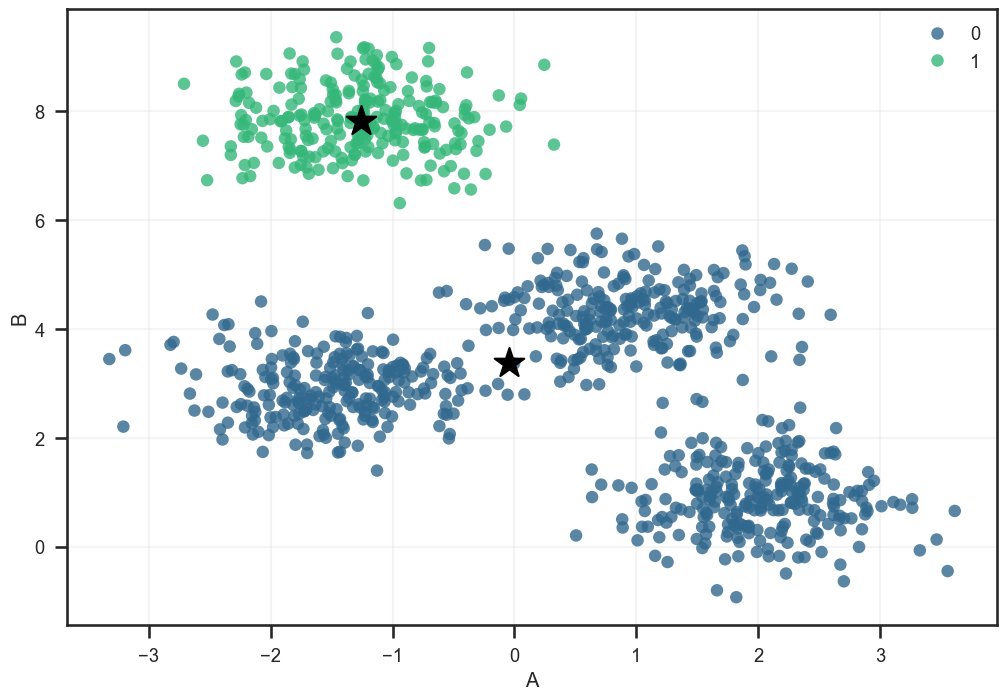

In [12]:
# Plot
ax=sns.scatterplot(data=df, x='A', y='B', hue=labels,**scatter_kwargs)
# Localizando os centroides
# * descompactar e Transporse 
ax.scatter(*model.cluster_centers_.T, marker="*", color='black', s=500)

In [13]:
# após o Fit, localizar os centros
model.cluster_centers_

array([[-0.04526102,  3.36568899],
       [-1.25504501,  7.81267459]])

In [16]:
@interact(bandwidth=(0.1,3,0.01))
def custon_meanshift(bandwidth):
    model = MeanShift(bandwidth=bandwidth,cluster_all=False)
    labels = model.fit_predict(X)
    ax=sns.scatterplot(data=df, x='A', y='B', hue=labels,**scatter_kwargs)
    ax.scatter(*model.cluster_centers_.T, marker="*", color='black', s=500)
    plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…